**DETEKSI KECURANGAN PADA TRANSAKSI MENGGUNAKAN MODEL ENSEMBLE RANDOM FOREST**

Mengimport Libary Yang Dibutuhkan

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Memuat Dan Memproses Data

In [3]:
# Memuat data pelatihan
df_train = pd.read_csv('financial_transactions_sample.csv')

# One-hot encoding untuk kolom kategorikal
df_train = pd.get_dummies(df_train, columns=['transaction_type', 'location', 'customer_id'], drop_first=True)

# Memisahkan fitur dan label
X_train = df_train.drop(['transaction_id', 'transaction_time', 'fraud_label'], axis=1)
y_train = df_train['fraud_label']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Melatih Model Random Forest Menggunakan Data Financial_transactions_sample.csv

In [4]:
# Inisialisasi dan melatih model Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Melakukan Prediksi Dan Evaluasi Model

In [10]:
# Prediksi dengan model Random Forest untuk data pengujian baru
y_pred_rf = rf_classifier.predict(X_train_scaled)

# Menghitung metrik evaluasi
accuracy_rf = accuracy_score(y_train, y_pred_rf)
precision_rf = precision_score(y_train, y_pred_rf)
recall_rf = recall_score(y_train, y_pred_rf)
f1_rf = f1_score(y_train, y_pred_rf)
roc_auc_rf = roc_auc_score(y_train, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Classifier :")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC AUC:", roc_auc_rf)


Random Forest Classifier :
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0


Visualisasi Metrik Evaluasi

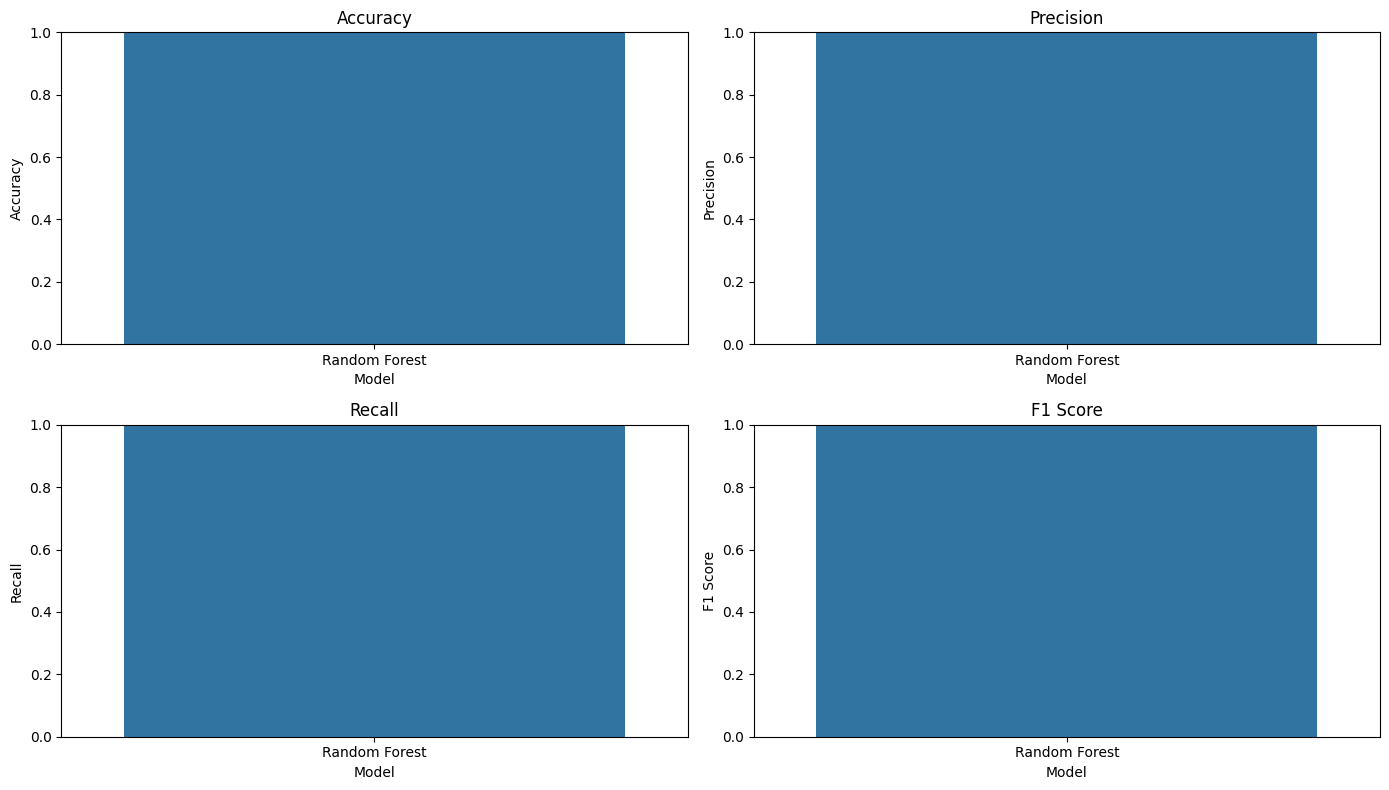

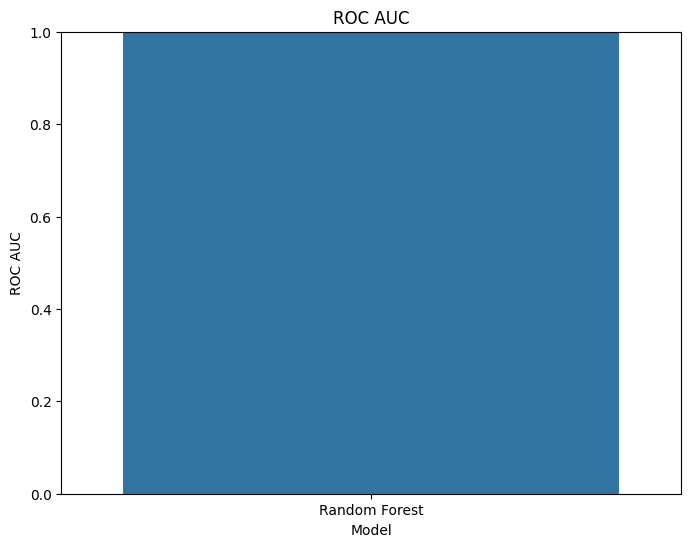

In [9]:
# Menyiapkan data untuk plot
metrics = {
    'Model': ['Random Forest'],
    'Accuracy': [accuracy_rf],
    'Precision': [precision_rf],
    'Recall': [recall_rf],
    'F1 Score': [f1_rf],
    'ROC AUC': [roc_auc_rf]
}

# Membuat DataFrame dari data metrik
metrics_df = pd.DataFrame(metrics)

# Plotting metrik evaluasi
plt.figure(figsize=(14, 8))

# Plot Akurasi
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy')
plt.ylim(0, 1)

# Plot Presisi
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall')
plt.ylim(0, 1)

# Plot F1-score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=metrics_df)
plt.title('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Plot ROC AUC
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='ROC AUC', data=metrics_df)
plt.title('ROC AUC')
plt.ylim(0, 1)
plt.show()


Memuat Data Dan Memproses Data Yang akan Digunakan Untuk pengujian

In [5]:
# Memuat data pengujian baru
df_test = pd.read_csv('financial_transactions_test.csv')

# One-hot encoding untuk kolom kategorikal
df_test = pd.get_dummies(df_test, columns=['transaction_type', 'location', 'customer_id'], drop_first=True)

# Memisahkan fitur dan label untuk data pengujian baru
X_test = df_test.drop(['transaction_id', 'transaction_time', 'fraud_label'], axis=1)
y_test = df_test['fraud_label']

# Normalisasi fitur numerik menggunakan scaler yang sama dengan data pelatihan
X_test_scaled = scaler.transform(X_test)

Melakukan Prediksi Dan Evaluasi Model

In [6]:
# Prediksi dengan model Random Forest untuk data pengujian baru
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Menghitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Classifier (Data Pengujian Baru):")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC AUC:", roc_auc_rf)

Random Forest Classifier (Data Pengujian Baru):
Accuracy: 0.9
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666
ROC AUC: 0.75


Visualisasi Metrik Evaluasi

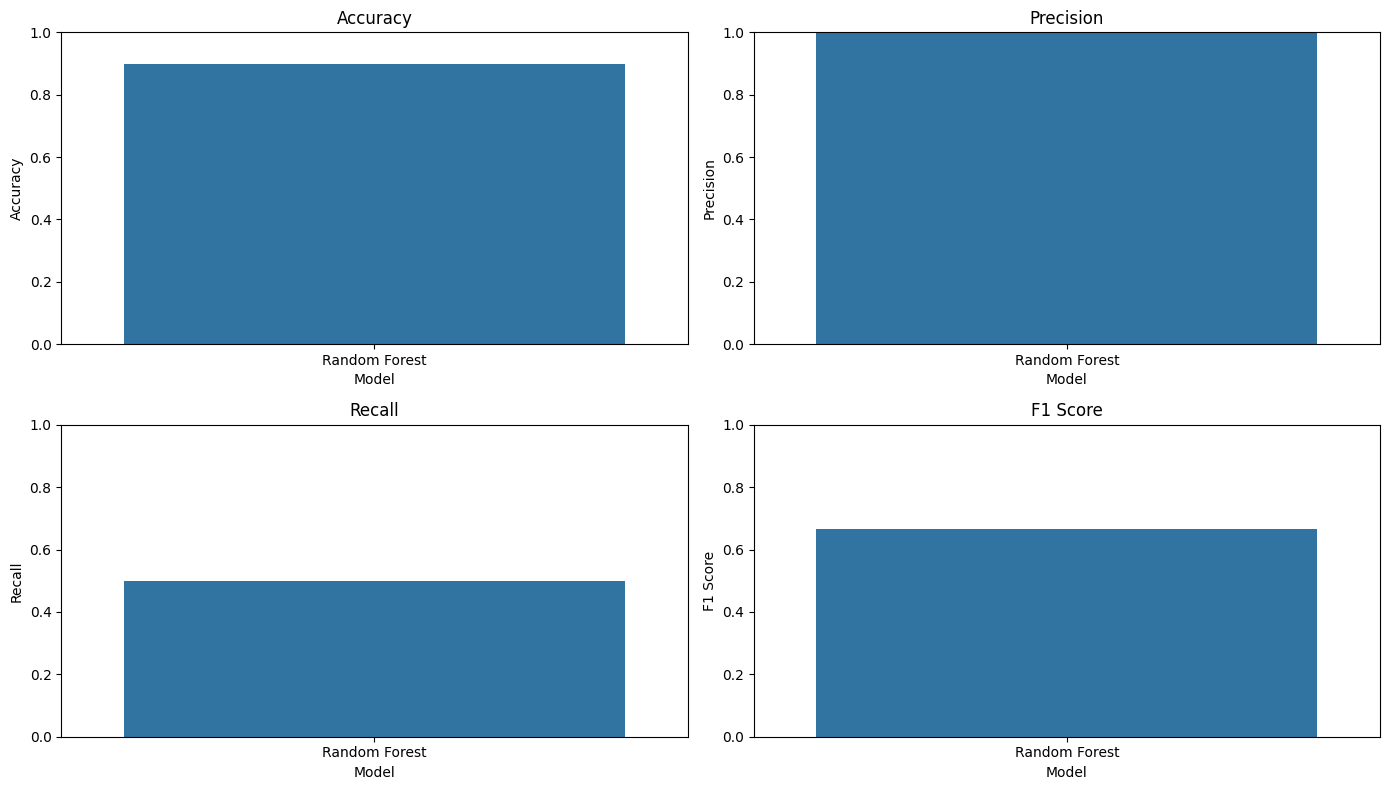

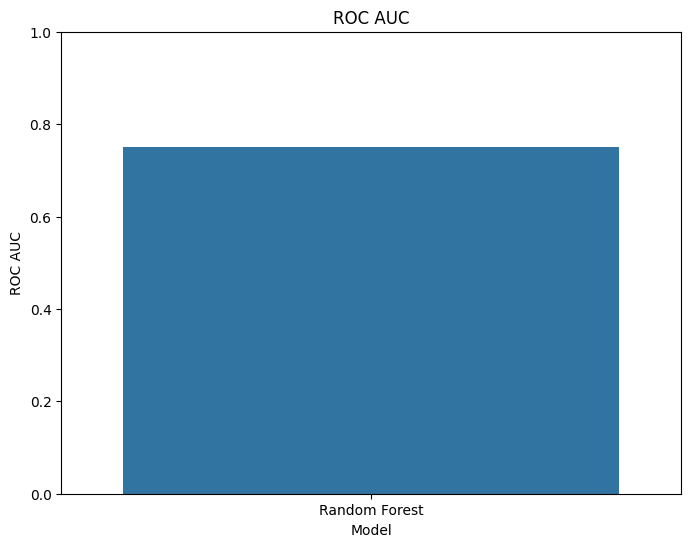

In [7]:
# Menyiapkan data untuk plot
metrics = {
    'Model': ['Random Forest'],
    'Accuracy': [accuracy_rf],
    'Precision': [precision_rf],
    'Recall': [recall_rf],
    'F1 Score': [f1_rf],
    'ROC AUC': [roc_auc_rf]
}

# Membuat DataFrame dari data metrik
metrics_df = pd.DataFrame(metrics)

# Plotting metrik evaluasi
plt.figure(figsize=(14, 8))

# Plot Akurasi
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy')
plt.ylim(0, 1)

# Plot Presisi
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall')
plt.ylim(0, 1)

# Plot F1-score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=metrics_df)
plt.title('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Plot ROC AUC
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='ROC AUC', data=metrics_df)
plt.title('ROC AUC')
plt.ylim(0, 1)
plt.show()
